In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('..')

from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

In [2]:
from src.data.VOC2012.data_preprocess import load_preprocess
from src.data.VOC2012.data import classes
json_file = '../data/preprocessed/VOC2012/annotations.json'
df = load_preprocess(json_file)
df.head()

,folder,filename,object,width,height,depth,object_count,img_id
0,VOC2012,2007_000027.jpg,"[{'class': [14], 'object': 1, 'bb': [0.3580246...",486,500,3,1,0
1,VOC2012,2007_000032.jpg,"[{'class': [0], 'object': 1, 'bb': [0.208, 0.2...",500,281,3,4,1
2,VOC2012,2007_000033.jpg,"[{'class': [0], 'object': 1, 'bb': [0.018, 0.2...",500,366,3,3,2
3,VOC2012,2007_000039.jpg,"[{'class': [19], 'object': 1, 'bb': [0.312, 0....",500,375,3,1,3
4,VOC2012,2007_000042.jpg,"[{'class': [18], 'object': 1, 'bb': [0.526, 0....",500,335,3,2,4


In [17]:
input_size= 256

x_train = np.array([img_to_array(Image.open(os.path.join('../data/raw/VOC2012/JPEGImages',file)).resize((256, 256))) for file in df['filename'].values[0:input_size]])

y_train_classes = np.vstack(df['object'].apply(lambda X: np.array([x['class'] for x in X])).values)
y_train_is_object = np.vstack(df['object'].apply(lambda X: np.array([x['object'] for x in X])).values)
y_train_bb = np.vstack(df['object'].apply(lambda X: np.array([x['bb'] for x in X])).values)
y_train = [y_train_classes[0:input_size], y_train_is_object[0:input_size], y_train_bb[0:input_size]]

In [18]:
y_train[0].shape

(256, 1)

In [19]:
y_train[1].shape

(256, 1)

In [20]:
from src.models.YOLOv3 import YOLOv3
K.clear_session()
model = YOLOv3(len(classes))

losses = ["sparse_categorical_crossentropy",
          "binary_crossentropy",
          "mean_absolute_error"
         ]
loss_weights = [0.5, 0.5, 5]
model.compile(loss=losses,loss_weights=loss_weights, optimizer='adam')

model.fit(x_train, y_train, epochs=30)


Train on 256 samples
Epoch 1/30
256/256 [==============================] - 31s 120ms/sample - loss: 158.9075 - output_1_loss: 313.6246 - output_2_loss: 0.1431 - output_3_loss: 0.4047
Epoch 2/30
256/256 [==============================] - 29s 115ms/sample - loss: 2.9561 - output_1_loss: 3.2139 - output_2_loss: 0.2600 - output_3_loss: 0.2438
Epoch 3/30
256/256 [==============================] - 29s 115ms/sample - loss: 2.6435 - output_1_loss: 2.9657 - output_2_loss: 0.1336 - output_3_loss: 0.2188
Epoch 4/30
256/256 [==============================] - 29s 114ms/sample - loss: 2.5558 - output_1_loss: 2.9043 - output_2_loss: 0.0556 - output_3_loss: 0.2152
Epoch 5/30
256/256 [==============================] - 29s 114ms/sample - loss: 2.4874 - output_1_loss: 2.8224 - output_2_loss: 0.0216 - output_3_loss: 0.2131
Epoch 6/30
256/256 [==============================] - 29s 114ms/sample - loss: 2.4519 - output_1_loss: 2.7819 - output_2_loss: 0.0158 - output_3_loss: 0.2106
Epoch 7/30
256/256 [=======

In [24]:
model.summary()

Model: "yol_ov3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
yolo_layer (YoloLayer)       multiple                  20576     
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  73856     
_________________________________________________________________
yolo_layer_1 (YoloLayer)     multiple                  82112     
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  295168    
_________________________________________________________________
yolo_layer_2 (YoloLayer)     multiple                  3280

In [31]:
model.fit(x_train, y_train, epochs=10)

Train on 256 samples
Epoch 1/10
256/256 [==============================] - 29s 115ms/sample - loss: 1.5306 - output_1_loss: 1.7944 - output_2_loss: 1.3287e-04 - output_3_loss: 0.1267
Epoch 2/10
256/256 [==============================] - 30s 115ms/sample - loss: 1.4564 - output_1_loss: 1.6207 - output_2_loss: 3.9822e-05 - output_3_loss: 0.1292
Epoch 3/10
256/256 [==============================] - 30s 116ms/sample - loss: 1.3601 - output_1_loss: 1.4814 - output_2_loss: 2.6950e-05 - output_3_loss: 0.1239
Epoch 4/10
256/256 [==============================] - 29s 114ms/sample - loss: 1.4254 - output_1_loss: 1.5450 - output_2_loss: 1.4006e-05 - output_3_loss: 0.1306
Epoch 5/10
256/256 [==============================] - 29s 115ms/sample - loss: 1.3715 - output_1_loss: 1.4312 - output_2_loss: 3.6749e-05 - output_3_loss: 0.1312
Epoch 6/10
256/256 [==============================] - 29s 115ms/sample - loss: 1.2706 - output_1_loss: 1.2611 - output_2_loss: 1.0996e-05 - output_3_loss: 0.1280
Epoch 7

In [34]:
pred = model.predict(x_train[0:5])
pred_cls = pred[0]
pred_bb = pred[2]

20.23226684331894 193.41564178466797 222.04641902446747 303.09098958969116


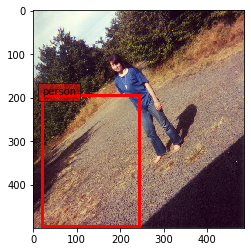

73.46305251121521 127.741219997406 285.5878472328186 74.88182598352432


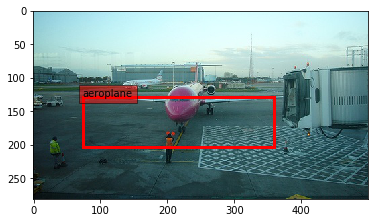

14.663413166999817 143.52247685194016 479.9085557460785 72.44903665781021


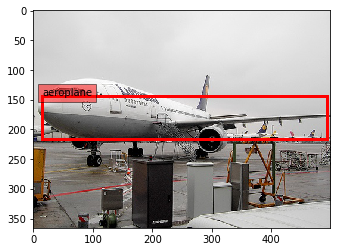

115.9658432006836 82.04073831439018 104.23049330711365 125.57105720043182


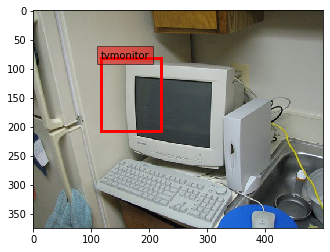

10.254011489450932 116.58522814512253 243.8238114118576 235.48783093690872


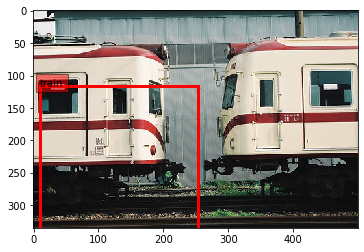

In [35]:
from src.data.VOC2012.data_preprocess import le

def plot(df_id, bb, cls):
    im = Image.open(os.path.join('../data/raw/VOC2012/JPEGImages', df['filename'][df_id]))
    
    plt.imshow(im)
    
    # Get the current reference
    ax = plt.gca()

    
    img_width = df['width'][df_id]
    img_height = df['height'][df_id]
    xmin = bb[0] * img_width
    ymin = bb[1] * img_height
    width = bb[2] * img_width
    height = bb[3] * img_height
    print(xmin, ymin, width, height)
#     center_x = (xmax + xmin)/2
#     center_y = (ymax + ymin)/2

    rect = Rectangle((xmin,ymin), width, height, fill=False, linewidth=3,edgecolor='r')
    plt.text(xmin, ymin, le.inverse_transform([np.argmax(cls)])[0], bbox=dict(facecolor='red', alpha=0.5))
    ax.add_patch(rect)


#     c = Circle((center_x, center_y), radius=5, color='r' )
#     ax.add_patch(c)
#     plt.plot(center_x, center_y,markersize=100)
    plt.show()
    
for i in range(5):
    plot(i, pred_bb[i], pred_cls[i])